In [73]:
import pandas as pd

# Import database from excel sheet. It is organized in columns [variable | unit | symbol | value]
# You can set index col (you can take symbol for cleaner formulas)
# df = pd.read_excel("../../database/ml_projekty.xlsx", sheet_name="Base", index_col="index", skiprows=1)

# to get value us df.at[<index>, "value"]

df8 = pd.read_excel("../../database/ml_projekty.xlsx", sheet_name="Base_pr8", index_col="index")
plane_prop= pd.read_csv("../../database/plane_properties.csv", index_col="Variable")
# display(df.head(10))
df8.columns



Index(['alpha', 'cz', 'c'x_p', 'a_p [deg]', 'Cmk', 'Cmp1', 'Cmp2', 'Cmp3',
       'Cmbu1', 'Cmbu2', 'Cmbu3'],
      dtype='object')

In [89]:
def get_prop(variable:str)->float: 
    return float(plane_prop.at[variable, "Value"])

# delta_h [rad]
def delta_h(Cmbu, kappa, cz):
    return Cmbu/(kappa*get_prop("a2"))-get_prop("a1")/get_prop("a2")*(cz/get_prop("a")*(1-get_prop("deps_dalpha"))+ get_prop("azh_2"))

In [83]:
deltas = ["delta_h1","delta_h2","delta_h3"]
kappas = ["kh_1","kh_2","kh_3"]
azhs = ["azh_1","azh_2","azh_3"]
cmbus = ["cmbu1","cmbu2","cmbu3"]
xc = []

In [90]:

for delta, kappa, cmbu in zip(deltas, kappas, cmbus):
    print(get_prop(cmbu), get_prop(kappa))
    for i, row in df8.iterrows():
        # get_prop(cmbu), get_prop(kappa), get_prop(azh)
        # print(delta, kappa, azh, cmbu)
        df8.at[i, delta] = delta_h(get_prop(cmbu), get_prop(kappa),  df8.at[i, "cz"])

-0.074770965 0.34
-0.039516728 0.326344089
-0.004262491 0.310137422


(0.0, 1.6)

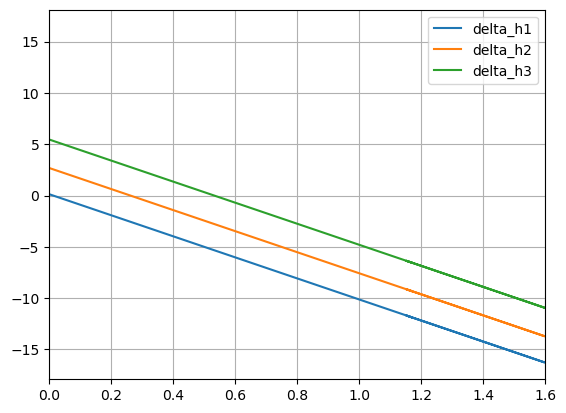

In [85]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
for delta in deltas:
    ax.plot(df8['cz'], df8[delta]*180/3.14, label = delta)

ax.grid(True)
ax.legend()
ax.set_xlim([0, 1.6])